In [ ]:
'''Build an ANN model for Drug classification.

This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information,
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to
develop a model that can accurately predict the class or category of a given drug based on its features.

Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

Task 1: Read the dataset and do data pre-processing
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)
Task 3: Test the model with random data'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\balod\\Documents\\AI Externship\\Assignments'

In [3]:
#Reading the dataset
df= pd.read_csv('drug200.csv')
#df= pd.read_csv(r'C:\Users\balod\Documents\AI Externship\Assignments\drug200.csv')

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
#Descriptive stat
df.describe(include= 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [7]:
#Checking the null value
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
#No null values, so no need to handle the null values

In [12]:
df['Drug'].dtype, df['Drug']

(dtype('O'),
 0      DrugY
 1      drugC
 2      drugC
 3      drugX
 4      DrugY
        ...  
 195    drugC
 196    drugC
 197    drugX
 198    drugX
 199    drugX
 Name: Drug, Length: 200, dtype: object)

In [13]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

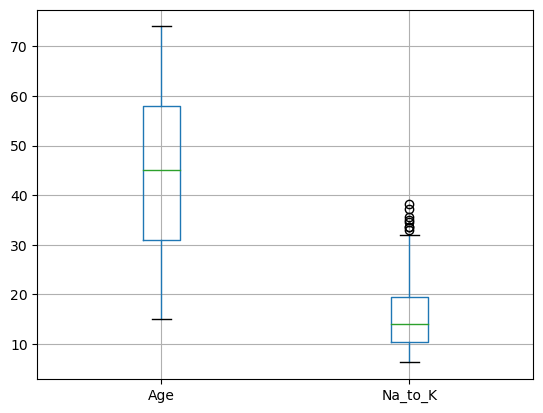

In [15]:
#Checking for outliers
df.boxplot()

In [18]:
sns.boxplot(df['Age'])

<Axes: >

In [19]:
#Splitting the data
#Splitting dependent and in-dependent
#Splitting training and testing data
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [21]:
x= df.iloc[:, 0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [23]:
y= df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [24]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=12)

In [26]:
x.shape, y.shape

((200, 5), (200,))

In [27]:
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [28]:
ytrain.shape, ytest.shape

((160,), (40,))

In [37]:
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,F,HIGH,NORMAL,19.161
47,68,M,LOW,HIGH,10.291
94,56,M,LOW,HIGH,15.015
14,50,F,NORMAL,HIGH,12.703
41,58,F,HIGH,NORMAL,14.239
...,...,...,...,...,...
3,28,F,NORMAL,HIGH,7.798
130,70,F,NORMAL,HIGH,20.489
134,42,F,HIGH,HIGH,21.036
155,49,M,LOW,HIGH,10.537


In [29]:
#Encoding the dependent data-y
from sklearn.preprocessing import LabelEncoder

In [30]:
le= LabelEncoder()

In [34]:
ytrain= le.fit_transform(ytrain)
ytrain

array([0, 3, 0, 4, 2, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 2, 0, 3, 0, 3, 0, 0,
       4, 2, 4, 4, 0, 0, 1, 0, 4, 1, 0, 4, 4, 4, 2, 1, 0, 4, 4, 4, 0, 0,
       4, 1, 4, 1, 0, 1, 0, 0, 4, 1, 0, 3, 1, 1, 1, 4, 1, 0, 0, 4, 0, 1,
       0, 2, 3, 0, 3, 1, 0, 4, 0, 0, 0, 0, 4, 0, 4, 3, 0, 2, 0, 0, 1, 4,
       2, 4, 0, 4, 0, 0, 0, 4, 2, 4, 1, 3, 0, 4, 4, 0, 0, 0, 3, 0, 4, 3,
       0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 4, 4, 1, 4, 1, 0, 0, 0, 4, 4,
       0, 0, 3, 2, 0, 1, 4, 0, 3, 0, 0, 4, 0, 0, 1, 4, 0, 0, 0, 0, 0, 1,
       1, 4, 0, 0, 3, 0])

In [35]:
ytest= le.fit_transform(ytest)
ytest

array([0, 4, 0, 0, 4, 0, 1, 4, 0, 3, 4, 0, 4, 0, 0, 2, 2, 4, 4, 2, 0, 0,
       1, 4, 4, 4, 4, 0, 2, 2, 0, 0, 4, 0, 0, 4, 0, 3, 3, 4])

In [38]:
xtrain['Sex']= le.fit_transform(xtrain['Sex'])
xtrain['Sex']

77     0
47     1
94     1
14     0
41     0
      ..
3      0
130    0
134    0
155    1
75     1
Name: Sex, Length: 160, dtype: int32

In [39]:
xtrain['BP']= le.fit_transform(xtrain['BP'])
xtrain['BP']

77     0
47     1
94     1
14     2
41     0
      ..
3      2
130    2
134    0
155    1
75     1
Name: BP, Length: 160, dtype: int32

In [40]:
xtrain['Cholesterol']= le.fit_transform(xtrain['Cholesterol'])
xtrain['Cholesterol']

77     1
47     0
94     0
14     0
41     1
      ..
3      0
130    0
134    0
155    0
75     1
Name: Cholesterol, Length: 160, dtype: int32

In [41]:
xtest['Sex']= le.fit_transform(xtest['Sex'])
xtest['BP']= le.fit_transform(xtest['BP'])
xtest['Cholesterol']= le.fit_transform(xtest['Cholesterol'])
xtest['Sex'],xtest['BP'],xtest['Cholesterol']

(23     0
 182    0
 172    0
 21     1
 63     1
 11     0
 61     1
 32     1
 164    1
 7      1
 95     1
 173    0
 132    1
 120    1
 98     1
 138    1
 31     1
 16     1
 181    0
 85     1
 185    0
 166    0
 101    0
 129    0
 113    0
 51     1
 167    0
 88     0
 108    1
 136    0
 29     1
 183    0
 152    1
 93     0
 189    1
 139    0
 179    0
 55     0
 1      1
 5      0
 Name: Sex, dtype: int32,
 23     1
 182    1
 172    2
 21     2
 63     1
 11     0
 61     0
 32     1
 164    0
 7      1
 95     1
 173    1
 132    1
 120    2
 98     0
 138    0
 31     0
 16     1
 181    2
 85     0
 185    2
 166    1
 101    0
 129    2
 113    1
 51     2
 167    2
 88     0
 108    0
 136    0
 29     1
 183    0
 152    2
 93     1
 189    0
 139    2
 179    2
 55     1
 1      1
 5      2
 Name: BP, dtype: int32,
 23     0
 182    1
 172    1
 21     0
 63     1
 11     1
 61     1
 32     1
 164    1
 7      0
 95     1
 173    1
 132    1
 120    0
 98     1

In [42]:
#Building an ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
#Initializing the sequential model
model= Sequential()

#Adding the input layer to the model
model.add(Dense(4,activation= 'relu'))

#Adding 1st hidden layer
model.add(Dense(128, activation= 'relu'))

#Adding 2nd hidden layer
model.add(Dense(64, activation= 'relu'))

#Adding 3rd hidden layer
model.add(Dense(32, activation= 'relu'))

#Adding output layer
model.add(Dense(1,activation='linear'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 24        
                                                                 
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,033
Trainable params: 11,033
Non-trainable params: 0
_________________________________________________________________


In [45]:
#Compiling the skeleton with loss function and gradient descent

model.compile(optimizer='adam', loss='mse')

In [46]:
#Training the model
model.fit(xtrain, ytrain, batch_size=4, epochs=20)

Epoch 1/20
40/40 [==============================] - 2s 3ms/step - loss: 3.7430
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 3.0763
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 2.4236
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 2.2730
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 2.1437
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 1.8875
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 1.5286
Epoch 8/20
40/40 [==============================] - 0s 3ms/step - loss: 1.5211
Epoch 9/20
40/40 [==============================] - 0s 3ms/step - loss: 1.4213
Epoch 10/20
40/40 [==============================] - 0s 2ms/step - loss: 1.1986
Epoch 11/20
40/40 [==============================] - 0s 3ms/step - loss: 1.2862
Epoch 12/20
40/40 [==============================] - 0s 3ms/step - loss: 1.1366
Epoch 13/20
40/40 [==============================

In [47]:
#Testing the model

ypred= model.predict(xtest)

2/2 [==============================] - 0s 2ms/step


In [48]:
#Comparing the predicted values with the actual ones

comp= pd.DataFrame(ytest)
comp.columns= ['Actual Values']
comp['Predicted Values']= ypred
comp

,Actual Values,Predicted Values
0,0,0.563591
1,4,2.576656
2,0,2.393304
3,0,-0.053442
4,4,3.363637
5,0,0.055941
6,1,1.406357
7,4,2.803132
8,0,0.124655
9,3,1.589224


In [57]:
r_comp=comp.round(0)
r_comp

,Actual Values,Predicted Values
0,0,1.0
1,4,3.0
2,0,2.0
3,0,-0.0
4,4,3.0
5,0,0.0
6,1,1.0
7,4,3.0
8,0,0.0
9,3,2.0


In [59]:
r_comp= r_comp.astype(int)
r_comp

,Actual Values,Predicted Values
0,0,1
1,4,3
2,0,2
3,0,0
4,4,3
5,0,0
6,1,1
7,4,3
8,0,0
9,3,2
